# Exercise 1
---
### An $m \times m$ _Hilbert matrix_ $H_m$ has entries $h_{ij} = 1/(i+j-1)$ for $ 1 \leq i, j \leq m$, and so it has the form
### $$\left [
   \begin{matrix}
     1 & 1/2 & 1/3 & \dots \\
     1/2 & 1/3 & 1/4 & \dots \\
     1/3 & 1/4 & 1/5 & \dots \\
     \vdots      & \vdots      & \vdots & \ddots 
   \end{matrix}
  \right ].$$

In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

## Part 1
### Generate the Hilbert matrix of order $m$, for $m=2,3,\ldots, 12$.
### For each $m$, compute the condition number of $H_{m}$,  _ie_ , in $p$-norm for $p=1$ and $2$, and make a plot of the results.

---
### Part 1.1 

Define the function of Hilbert matrix

In [4]:
def hilbert_matrix(m):
    '''
    Return:
        2D np.array, the Hildert Matrix of order m
    '''
    ### BEGIN SOLUTION
    return np.array([[1/(i + j + 1) for j in range(m)] for i in range(m)])
    ### END SOLUTION

Test your function.

In [6]:
print('H_2:\n', hilbert_matrix(2))
### BEGIN HIDDEN TESTS
assert np.mean(np.array(hilbert_matrix(3)) - np.array([[1, 1/2, 1/3], [1/2, 1/3, 1/4], [1/3, 1/4, 1/5]])) < 1e-7
### END HIDDEN TESTS

H_2:
 [[1.         0.5       ]
 [0.5        0.33333333]]


---
### Part 1.2

Collect all Hilbert matrices into the list `H_m` for m = 2, 3, ..., 12.


In [8]:
H_m = []
### BEGIN SOLUTION
H_m = [hilbert_matrix(m) for m in range(2,13)]
### END SOLUTION

Check your Hilbert matrix list.

In [16]:
for i in range(len(H_m)):
    print('H_%d:' % (i+2))
    print(H_m[i])
    print()
### BEGIN HIDDEN TESTS
error = 0
for m in range(2, 13):
    error += LA.norm(hilbert_matrix(m) - np.array([[1/(i + j + 1) for j in range(m)] for i in range(m)]))
assert error < 1e-16
### END HIDDEN TESTS

H_2:
[[1.         0.5       ]
 [0.5        0.33333333]]

H_3:
[[1.         0.5        0.33333333]
 [0.5        0.33333333 0.25      ]
 [0.33333333 0.25       0.2       ]]

H_4:
[[1.         0.5        0.33333333 0.25      ]
 [0.5        0.33333333 0.25       0.2       ]
 [0.33333333 0.25       0.2        0.16666667]
 [0.25       0.2        0.16666667 0.14285714]]

H_5:
[[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]

H_6:
[[1.         0.5        0.33333333 0.25       0.2        0.16666667]
 [0.5        0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.33333333 0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.25       0.2        0.16666667 0.14285714 0.125      0.11111111]
 [0.2        0.16666667 0.14285714 0.125      0.1111111

---
### Part 1.3

Plot the condition number of $H_m$ for $m=2,3,\ldots, 12$

Collect all condition numbers in 1-norm of `H_m` into a list `one_norm`

In [53]:
one_norm = []
# BEGIN SOLUTION
for H in H_m:
    one_norm.append(LA.norm(H, 1) / LA.norm(LA.inv(H),1))
### END SOLUTION

In [54]:
print('one_norm:\n', one_norm)
### BEGIN HIDDEN TESTS
assert (len(one_norm) == 11) and (round(LA.norm(one_norm), 5) == 0.08345)
### END HIDDEN TESTS

one_norm:
 [0.0833333333333333, 0.004493464052287565, 0.0001529613313754416, 5.524906439530675e-06, 2.0648236634229542e-07, 6.8239373011986446e-09, 2.180731781117476e-10, 7.277807301738786e-12, 2.426409655085816e-13, 7.405321461564635e-15, 2.2927255541048516e-16]


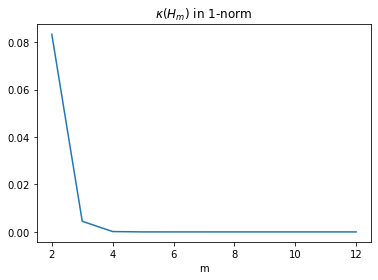

In [55]:
plt.plot(range(2,13), one_norm)
plt.xlabel('m')
plt.title(r'$\kappa(H_m)$ in 1-norm')
plt.show()

Collect all condition numbers in 2-norm of `H_m` into a list `two_norm`

In [56]:
two_norm = []
### BEGIN SOLUTION
for H in H_m:
    two_norm.append(LA.norm(H, 2) / LA.norm(LA.inv(H),2))
### END SOLUTION

In [57]:
print('two_norm:\n', two_norm)
### BEGIN HIDDEN TESTS
assert (len(two_norm) == 11) and (round(LA.norm(two_norm), 5) == 0.08342)
### END HIDDEN TESTS

two_norm:
 [0.08333333333333331, 0.0037846322866590615, 0.00014507417740932795, 5.152351054704493e-06, 1.75294393226791e-07, 5.8029649459806015e-09, 1.8851022175103752e-10, 6.040040201319613e-12, 1.915186399055e-13, 6.033324907869738e-15, 1.8437448164229013e-16]


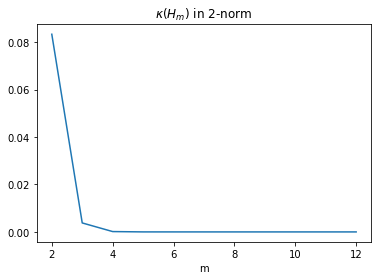

In [58]:
plt.plot(range(2,13), two_norm)
plt.xlabel('m')
plt.title(r'$\kappa(H_m)$ in 2-norm')
plt.show()

---
## Part 2 

### Now generate the $m$-vector $b_m = H_{m} x$ also, where $x$ is the $m$-vector with all of its components equal to $1$.

### Use Gaussian elimination to solve the resulting linear system $H_{m} x = b_m$ with $H_{m}$ and $b$ given above, obtaining an approximate solution $\tilde{x}$.

### Part 2.1

Construct the $m$-vector $b_m$ for $m = 2, 3, \dots, 12$. Store all 1D `np.array` $b_m$ into the list `b_m`.

In [59]:
'''
Hint:
    b_m = ?
'''
### BEGIN SOLUTION
b_m = [H @ np.ones(len(H)) for H in H_m]
### END SOLUTION

Print `b_m`

In [60]:
for i in range(len(b_m)):
    print('b_%d:' % (i+2))
    print(b_m[i])
    print()
### BEGIN HIDDEN TESTS
error = 0
for m in range(2,13):
    error += LA.norm(b_m[m-2] - np.array([[1/(i + j + 1) for j in range(m)] for i in range(m)])@np.ones(m))
assert error < 1e-16
### END HIDDEN TESTS

b_2:
[1.5        0.83333333]

b_3:
[1.83333333 1.08333333 0.78333333]

b_4:
[2.08333333 1.28333333 0.95       0.75952381]

b_5:
[2.28333333 1.45       1.09285714 0.88452381 0.74563492]

b_6:
[2.45       1.59285714 1.21785714 0.99563492 0.84563492 0.73654401]

b_7:
[2.59285714 1.71785714 1.32896825 1.09563492 0.93654401 0.81987734
 0.73013376]

b_8:
[2.71785714 1.82896825 1.42896825 1.18654401 1.01987734 0.89680042
 0.80156233 0.72537185]

b_9:
[2.82896825 1.92896825 1.51987734 1.26987734 1.09680042 0.96822899
 0.86822899 0.78787185 0.72169538]

b_10:
[2.92896825 2.01987734 1.60321068 1.34680042 1.16822899 1.03489566
 0.93072899 0.84669538 0.77725094 0.7187714 ]

b_11:
[3.01987734 2.10321068 1.68013376 1.41822899 1.23489566 1.09739566
 0.98955252 0.90225094 0.82988251 0.7687714  0.71639045]

b_12:
[3.10321068 2.18013376 1.75156233 1.48489566 1.29739566 1.15621919
 1.04510808 0.95488251 0.87988251 0.81639045 0.761845   0.71441417]



### Part 2.2

Implement the function of __Gaussian elimination__. 

(Note that you need to implement it by hand, simply using some package functions is not allowed.)

In [77]:
def gaussian_elimination(
    A,
    b
):
    '''
    Arguments:
        A : 2D np.array
        b : 1D np.array

    Return:
        x : 1D np.array, solution to Ax=b
    '''
    
    ### BEGIN SOLUTION
    
    # Initial Setting
    U = np.copy(A)
    m = len(A)
    x = np.zeros(m)
    new_b = np.copy(b)
    
    # Gaussian Elimination
    for k in range(m-1):
        L = np.diag(np.ones(m))
        for j in range(k + 1, m):
            L[j, k] = -U[j, k] / U[k, k]
            U[j, k:] = U[j, k:] + L[j, k]*U[k, k:]
            new_b[j] = new_b[j] + L[j, k]*new_b[k]

    # Solve x
    for i in range(m):
        if i == 0:
            x[-1] = new_b[-1] / U[-1, -1]
        else:
            x[-1-i] = (new_b[-1-i] - U[-1-i, -i:]@x[-i:]) / U[-1-i, -1-i]
    
    return x
    ### END SOLUTION

Store all approximate solutions $\tilde{x}$ of $H_m$ into a list `x_m` for $m = 2, 3, \dots, 12$

In [78]:
x_m = []
for i in range(len(H_m)):
    x = gaussian_elimination(H_m[i], b_m[i])
    x_m.append(x)

---
## Part 3

### Investigate the error behavior of the computed solution $\tilde x$.
### (i) Compute the $\infty$-norm of the residual $r = b-H_{m} \tilde{x}$.
### (ii) Compute the error $\delta x = \tilde{x}-x$, where $x$ is the vector of all ones. 
### (iii) How large can you take $m$ before there is no significant digits in the solution ?

### Part 3.1

Compute the $\infty$-norm of the residual $r_m = b_m-H_{m} \tilde{x}$ for $m = 2, 3, \dots, 12$. And store the values into the list `r_m`.

In [79]:
r_m = []
### BEGIN SOLUTION
for i in range(len(H_m)):
    r_m.append(LA.norm(b_m[i] - H_m[i]@x_m[i], np.inf))
### END SOLUTION

In [80]:
print('r_m:\n', r_m)
### BEGIN HIDDEN TESTS
assert np.sum(r_m) < 1e-12
### END HIDDEN TESTS

r_m:
 [0.0, 2.220446049250313e-16, 0.0, 2.220446049250313e-16, 2.220446049250313e-16, 2.220446049250313e-16, 2.220446049250313e-16, 4.440892098500626e-16, 2.220446049250313e-16, 4.440892098500626e-16, 4.440892098500626e-16]


Plot the figure of the $\infty$-norm of the residual for $m = 2, 3, \dots, 12$

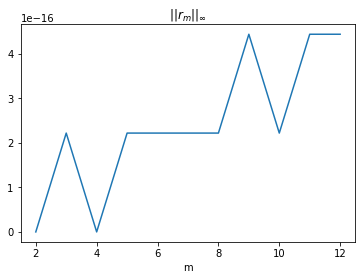

In [81]:
plt.plot(range(2,13), r_m)
plt.xlabel('m')
plt.title(r'$||r_m||_\infty$')
plt.show()

### Part 3.2

Compute the error $\delta x = \tilde{x}-x$, where $x$ is the vector of all ones. And store the values into the list `delta_x`.

In [82]:
delta_x = []
### BEGIN SOLUTION
for x in x_m:
    delta_x.append(x - np.ones(len(x)))
### END SOLUTION

Collect all errors $\delta x$ in 2-norm into the list `delta_x_two_norm` for $m = 2, 3, ..., 12$

In [83]:
delta_x_two_norm = []
### BEGIN SOLUTION
for delta in delta_x:
    delta_x_two_norm.append(LA.norm(delta, 2))
### END SOLUTION

In [90]:
print('delta_x_two_norm =', delta_x_two_norm)
### BEGIN HIDDEN TESTS
assert (len(delta_x_two_norm) == 11) and (np.mean(delta_x_two_norm) <= 0.1)
### END HIDDEN TESTS

delta_x_two_norm = [8.005932084973442e-16, 1.762179615616027e-14, 1.531093756529614e-13, 3.4726989976779822e-12, 3.380198688368993e-10, 9.687978241052163e-09, 4.244691764807721e-07, 1.7393602379023114e-07, 0.0001452735113877698, 0.007757231295806999, 0.6867691718060317]


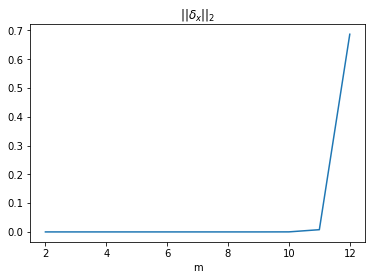

In [91]:
plt.plot(range(2,13), delta_x_two_norm)
plt.xlabel('m')
plt.title(r'$||\delta_x||_2$')
plt.show()

### Part 3.3

How large can you take  $m$  before there is no significant digits in the solution ?

> Please write down your answer here.